In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("train.csv",usecols=['Age', 'Fare', 'Survived'])

In [3]:
ds.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
# lets check the missing values
ds.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### Note
Imputation should be done in train as well as test set. For now we will consider only the training set.

In [5]:
# Lets add the missing indicator

ds['Age_NAN'] = np.where(ds['Age'].isnull(), 1, 0)

In [6]:
# lets see the dataset
ds.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [7]:
# Calculating the mean of Age column
mean = ds['Age'].mean()
mean = np.round(mean, 1)
print(mean)

29.7


In [8]:
# Calculating the median of Age column
median = ds['Age'].median()
print(median)

28.0


In [9]:
# Calculating the mode of Age column
mode = int(ds['Age'].mode())
print(mode)

24


In [10]:
# Lets create new columns and fill the missing value and compare with the original values

# Mean Imputation
ds['Age_Mean'] = ds['Age'].fillna(mean)

# Median Imputation
ds['Age_Median']= ds['Age'].fillna(median)

# Mode Imputation
ds['Age_Mode'] = ds['Age'].fillna(mode)

In [11]:
# lets print the dataset
ds.head(10)

,Survived,Age,Fare,Age_NAN,Age_Mean,Age_Median,Age_Mode
0,0,22.0,7.2500,0,22.0,22.0,22.0
1,1,38.0,71.2833,0,38.0,38.0,38.0
2,1,26.0,7.9250,0,26.0,26.0,26.0
3,1,35.0,53.1000,0,35.0,35.0,35.0
4,0,35.0,8.0500,0,35.0,35.0,35.0
5,0,NaN,8.4583,1,29.7,28.0,24.0
6,0,54.0,51.8625,0,54.0,54.0,54.0
7,0,2.0,21.0750,0,2.0,2.0,2.0
8,1,27.0,11.1333,0,27.0,27.0,27.0
9,1,14.0,30.0708,0,14.0,14.0,14.0


In [12]:
# let's compare the variance after mean / median imputation.
# This is expected as the percentage of missing data is high in Age, ~20%.


print('Original variable variance: ', ds['Age'].var())
print('Variance after median imputation: ', ds['Age_Median'].var())
print('Variance after mean imputation: ', ds['Age_Mean'].var())

Original variable variance:  211.01912474630802
Variance after median imputation:  169.51249827942345
Variance after mean imputation:  169.05240006128705


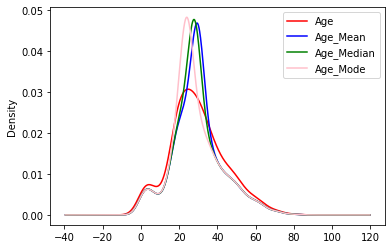

In [13]:
# lets compare the plot
# We can see that the distribution has changed:
# there are now more values towards the median
# or median.

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ds['Age'].plot(kind="kde", ax=ax, color="red")
ds['Age_Mean'].plot(kind="kde", ax=ax, color="blue")
ds['Age_Median'].plot(kind="kde", ax=ax, color="green")
ds['Age_Mode'].plot(kind="kde", ax=ax, color="pink")

lines,_=ax.get_legend_handles_labels()
ax.legend(lines, ['Age','Age_Mean', 'Age_Median', 'Age_Mode'], loc="best")

In [14]:
# Also we know that mean/median/mode imputation may affext the relationship with other variables in dataset

# Let's compare the covariance

ds[['Fare', 'Age', 'Age_Mean', 'Age_Median', 'Age_Mode']].cov()

,Fare,Age,Age_Mean,Age_Median,Age_Mode
Fare,2469.436846,73.849030,59.160437,62.556767,70.548131
Age,73.849030,211.019125,211.019125,211.019125,211.019125
Age_Mean,59.160437,211.019125,169.052400,169.052161,169.051599
Age_Median,62.556767,211.019125,169.052161,169.512498,170.595645
Age_Mode,70.548131,211.019125,169.051599,170.595645,174.228695


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


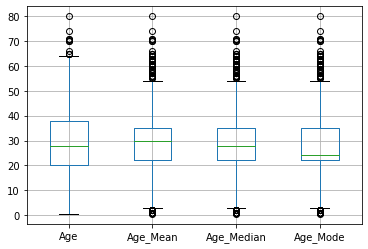

In [15]:
# Let's see the effect of imputation on outliers
# imputation may lead to increase in number of detected outliers
# Let's find out using a boxplot.
ds[['Age', 'Age_Mean', 'Age_Median','Age_Mode']].boxplot()

Now we have to do the same steps for test set as well.

With this Missing Indicator, our model will know the importance of the missing values.